This is how you match zebra to horses and back!

In [1]:
import torch

In [2]:
from torchvision import models

In [25]:
#https://github.com/deep-learning-with-pytorch/dlwpt-code/blob/master/p1ch2/3_cyclegan.ipynb
import torch.nn as nn

class ResNetBlock(nn.Module):

  def __init__(self, dim):
    super(ResNetBlock, self).__init__()
    self.conv_block = self.build_conv_block(dim)

  def build_conv_block(self, dim):
    conv_block = []

    conv_block += [nn.ReflectionPad2d(1)]

    conv_block += [nn.Conv2d(dim,dim, kernel_size=3, padding=0, bias=True),
                   nn.InstanceNorm2d(dim),
                   nn.ReLU(True)]
    
    conv_block += [nn.ReflectionPad2d(1)]

    conv_block += [nn.Conv2d(dim,dim, kernel_size=3, padding=0, bias=True),
                   nn.InstanceNorm2d(dim)]
    
    return nn.Sequential(*conv_block)
  
  def forward(self, x):
    out = x + self.conv_block(x)
    return out
  

class ResNetGenerator(nn.Module):
  def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9):
    assert(n_blocks >= 0)
    super(ResNetGenerator, self).__init__()

    self.input_nc = input_nc
    self.output_nc = output_nc
    self.ngf = ngf

    model = [nn.ReflectionPad2d(3),
             nn.Conv2d(input_nc,ngf, kernel_size=7, padding=0, bias=True),
             nn.InstanceNorm2d(ngf),
             nn.ReLU(True)]
    n_downsampling = 2

    for i in range(n_downsampling):
      mult = 2 **i
      model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,stride=2, padding=1, bias=True),
                nn.InstanceNorm2d(ngf * mult * 2),
                nn.ReLU(True)]
    mult = 2**n_downsampling
    for i in range(n_blocks):
      model += [ResNetBlock(ngf*mult)]
    
    for i in range(n_downsampling):
      mult = 2**n_downsampling
      model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2), 
                                   kernel_size=3, stride=2, padding=1, 
                                   output_padding=1, bias=True),
                nn.InstanceNorm2d(int(ngf * mult/2)),
                nn.ReLU(True)]
      model += [nn.ReflectionPad2d(3)]
      model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
      model += [nn.Tanh()]

      self.model = nn.Sequential(*model)
    
    def forward(self, input):
      return self.model(input)

In [22]:
netG = ResNetGenerator()

# netG model has been created but it has random weights so 
# we need to get the weights file

In [13]:
#https://towardsdatascience.com/4-awesome-ways-of-loading-ml-data-in-google-colab-9a5264c61966
# import requests, io

# r = requests.get('https://github.com/deep-learning-with-pytorch/dlwpt-code/blob/master/data/p1ch2/horse2zebra_0.4.0.pth?raw=true')
# print(r.content)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
!wget 'https://github.com/deep-learning-with-pytorch/dlwpt-code/blob/master/data/p1ch2/horse2zebra_0.4.0.pth?raw=true'

--2021-01-16 05:25:22--  https://github.com/deep-learning-with-pytorch/dlwpt-code/blob/master/data/p1ch2/horse2zebra_0.4.0.pth?raw=true
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/deep-learning-with-pytorch/dlwpt-code/raw/master/data/p1ch2/horse2zebra_0.4.0.pth [following]
--2021-01-16 05:25:22--  https://github.com/deep-learning-with-pytorch/dlwpt-code/raw/master/data/p1ch2/horse2zebra_0.4.0.pth
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/horse2zebra_0.4.0.pth [following]
--2021-01-16 05:25:22--  https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/horse2zebra_0.4.0.pth
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.

In [26]:
model_path = '/content/horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

<All keys matched successfully>

In [27]:
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [29]:
from PIL import Image
from torchvision import transforms

In [30]:
# we define the input transformations to make sure data enters th network with the right sahpe and size

preprocess = transforms.Compose([transforms.Resize(256),
                                  transforms.ToTensor()])

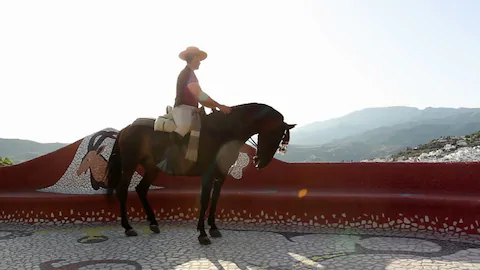

In [67]:
img = Image.open('man_on_horse.jpg')
img

In [68]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

In [69]:
batch_out = netG(batch_t)
# this is the out which we can conver back to an image

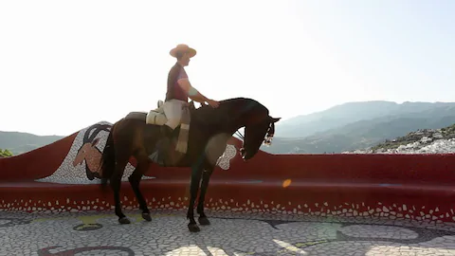

In [70]:
img_int = transforms.ToPILImage()(img_t)
img_int

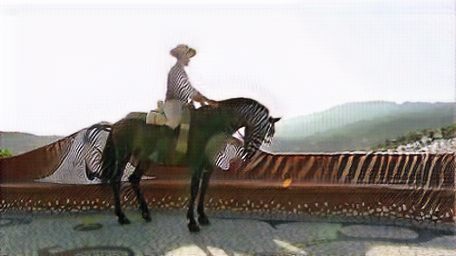

In [71]:
out_t = (batch_out.data.squeeze() + 1.0)/ 2.0
out_img =transforms.ToPILImage()(out_t)
out_img.save('zebra.jpeg')
out_img